Sampling Rate: 384000
Length of Recorded Signal: 12155907
Duration of Audio signal:  31.6560078125


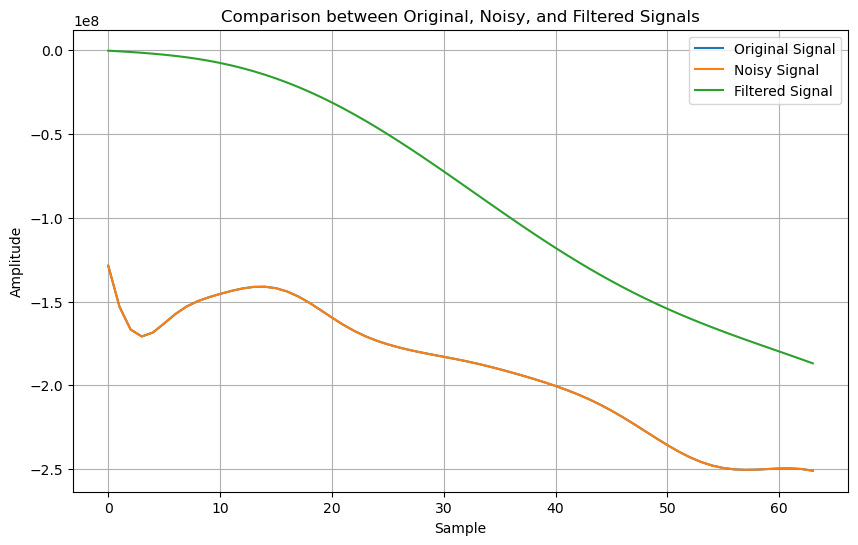

In [8]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Step 2: Read the WAV file
sampling_rate, audio_data = wav.read(r"untitled.wav")

# Step 3: Sampling Rate
print("Sampling Rate:", sampling_rate)

# Step 4: Length of the Recorded Signal
signal_length = len(audio_data)
print("Length of Recorded Signal:", signal_length)
print("Duration of Audio signal: ",signal_length/sampling_rate)

# Step 5: Segmenting the Signal
segment_length = 64
segmented_signal = audio_data[:segment_length]  # Take only one channel and convert to 1D

# Step 6: Adding Noise
noise = np.random.uniform(-0.5, 0.5, segment_length)
noisy_signal = segmented_signal + noise

# Step 7: Filtering the Signal
# Example of designing a low-pass FIR filter
numtaps = 64
cutoff_hz = 1000
nyquist_rate = 0.5 * sampling_rate
normalized_cutoff_freq = cutoff_hz / nyquist_rate
fir_coeff = firwin(numtaps, normalized_cutoff_freq)

# Applying the FIR filter
filtered_signal = lfilter(fir_coeff, 1.0, noisy_signal)

# Step 8: Plotting
plt.figure(figsize=(10, 6))
plt.plot(segmented_signal, label='Original Signal')
plt.plot(noisy_signal, label='Noisy Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Comparison between Original, Noisy, and Filtered Signals')
plt.grid(True)
plt.show()